In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

Matplotlib is building the font cache; this may take a moment.


In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_seqlet_occurences/cardiomyocyte"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9,xs.neg.pattern_0,xs.neg.pattern_1,xs.neg.pattern_2,xs.neg.pattern_3,xs.neg.pattern_4
0,chr1,3121385,3121656,total_peak_193,455,.,4.26059,45.5950,43.6826,129,...,0,0,0,0,0,0,0,0,0,0
1,chr1,3670599,3672419,total_peak_195a,2121,.,6.46852,212.1300,209.8280,248,...,0,0,0,0,0,0,0,0,0,0
2,chr1,3670599,3672419,total_peak_195b,2112,.,6.45339,211.2760,208.9760,496,...,0,0,0,0,0,0,0,0,0,0
3,chr1,3670599,3672419,total_peak_195c,9047,.,15.64050,904.7320,901.8890,1143,...,0,0,0,0,0,0,0,0,0,0
4,chr1,4205616,4206042,total_peak_196,1457,.,7.98861,145.7320,143.5400,176,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260246,JH584304.1,103146,103422,total_peak_181,20620,.,4.15173,2062.0200,2058.7700,167,...,0,0,0,0,0,0,0,0,0,0
260247,JH584304.1,103766,104119,total_peak_182,157531,.,12.95780,15753.1000,15747.4000,107,...,0,0,0,0,0,0,0,0,0,0
260248,JH584304.1,104202,104357,total_peak_183,21028,.,4.17357,2102.8300,2099.5700,81,...,0,0,0,0,0,0,0,0,0,0
260249,JH584304.1,108007,108157,total_peak_184,2419,.,2.08329,241.9360,239.5930,129,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_21538/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)
/tmp/ipykernel_21538/3756136185.py:12: RuntimeWarning: divide by zero encountered in log10
  counts_nlp = -np.log10(counts_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
0,ss.pos.pattern_0,0.078974,-0.030711,257.640236,inf
110,xs.pos.pattern_9,-0.319807,-0.045918,inf,inf
23,ss.pos.pattern_3,-0.215263,-0.033696,inf,inf
75,xs.pos.pattern_2,0.088883,-0.040904,226.522559,inf
108,xs.pos.pattern_7,-0.246167,-0.042924,inf,inf
86,xs.pos.pattern_3,-0.224179,-0.034143,inf,inf
12,ss.pos.pattern_2,0.086024,-0.040404,215.581404,inf
63,xs.pos.pattern_0,0.011788,-0.048221,19.070545,inf
64,xs.pos.pattern_1,0.077245,-0.033796,235.191088,inf
1,ss.pos.pattern_1,-0.015380,-0.052020,3.938404,inf


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


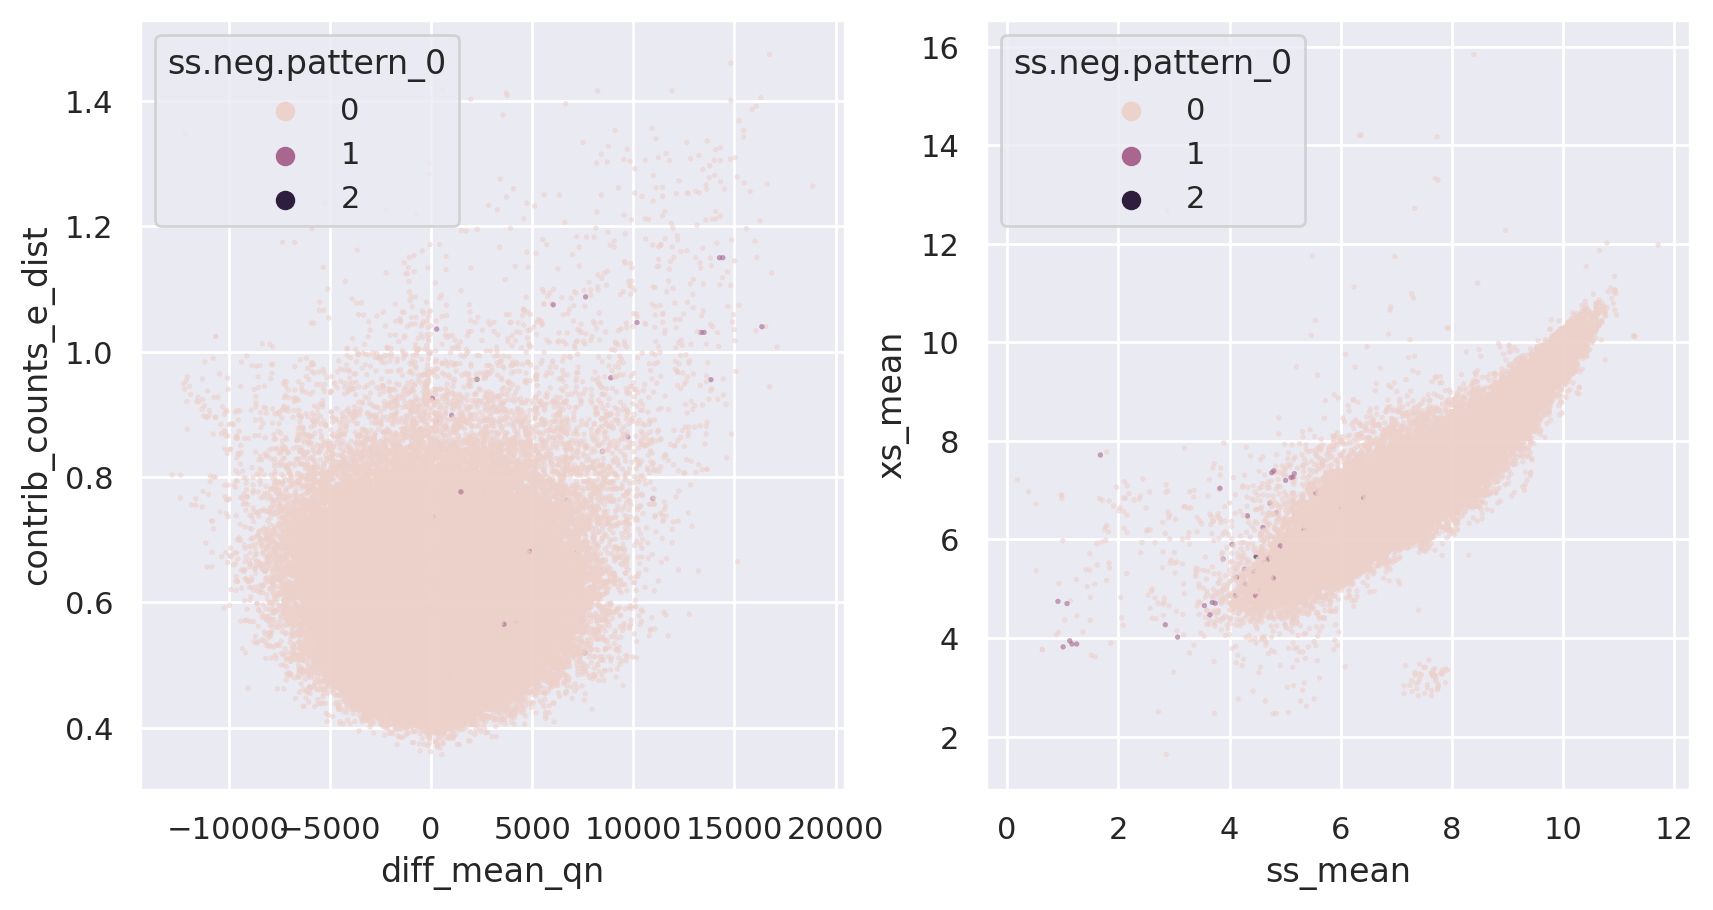

In [11]:
plot_pattern("ss.neg.pattern_0")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


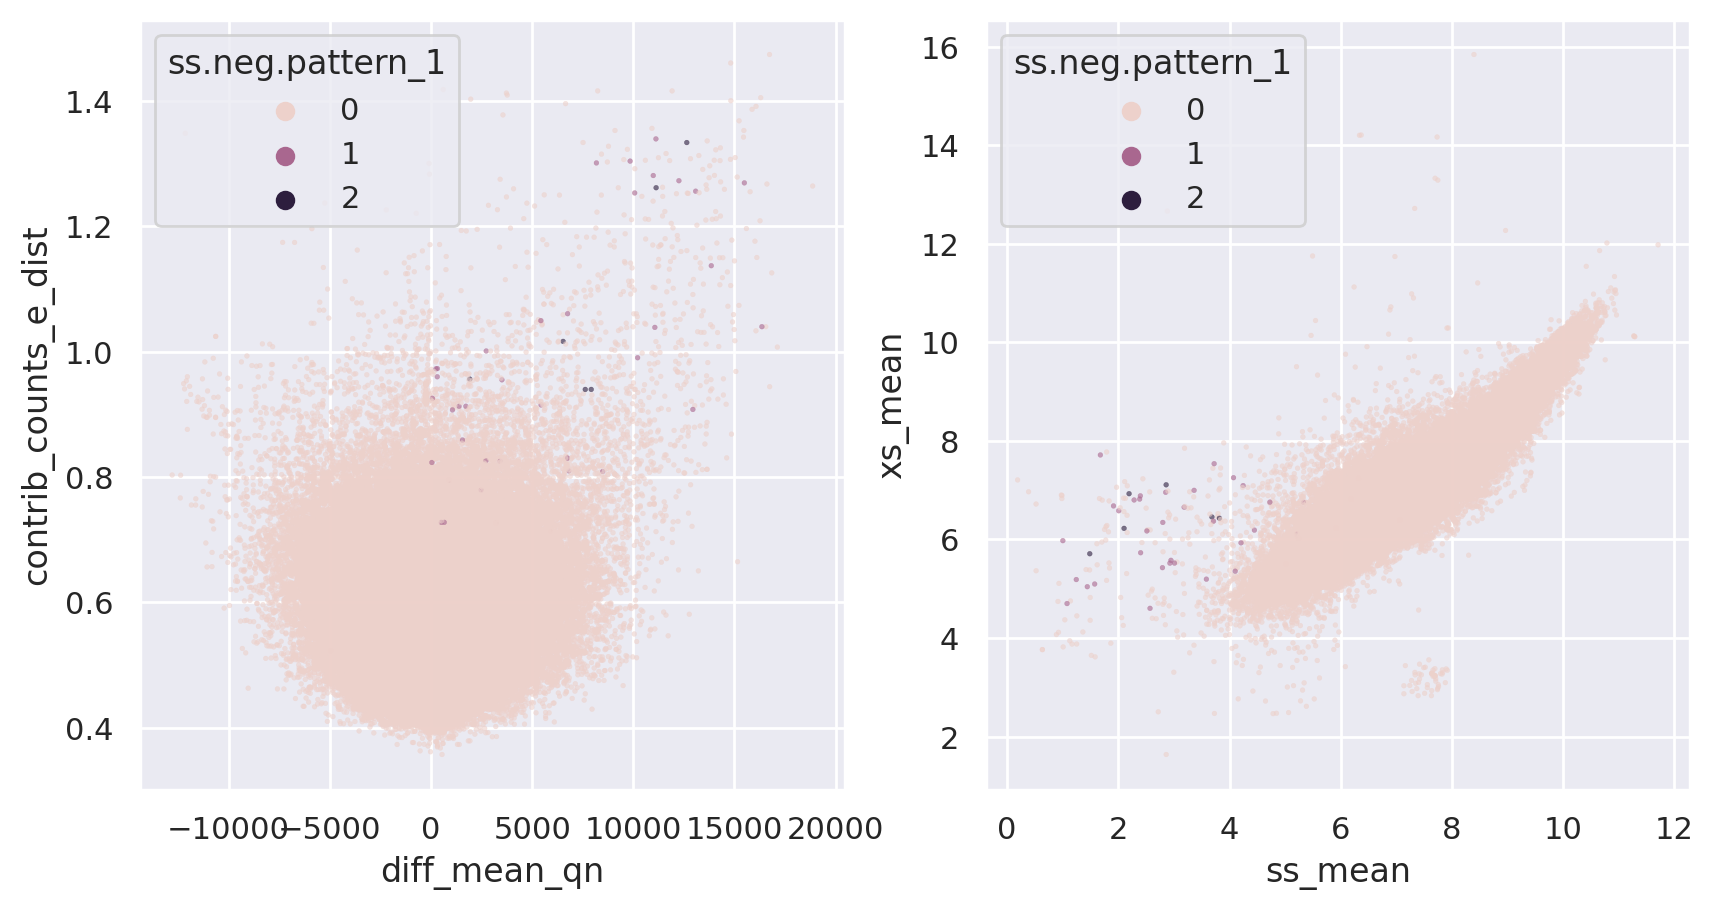

In [12]:
plot_pattern("ss.neg.pattern_1")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


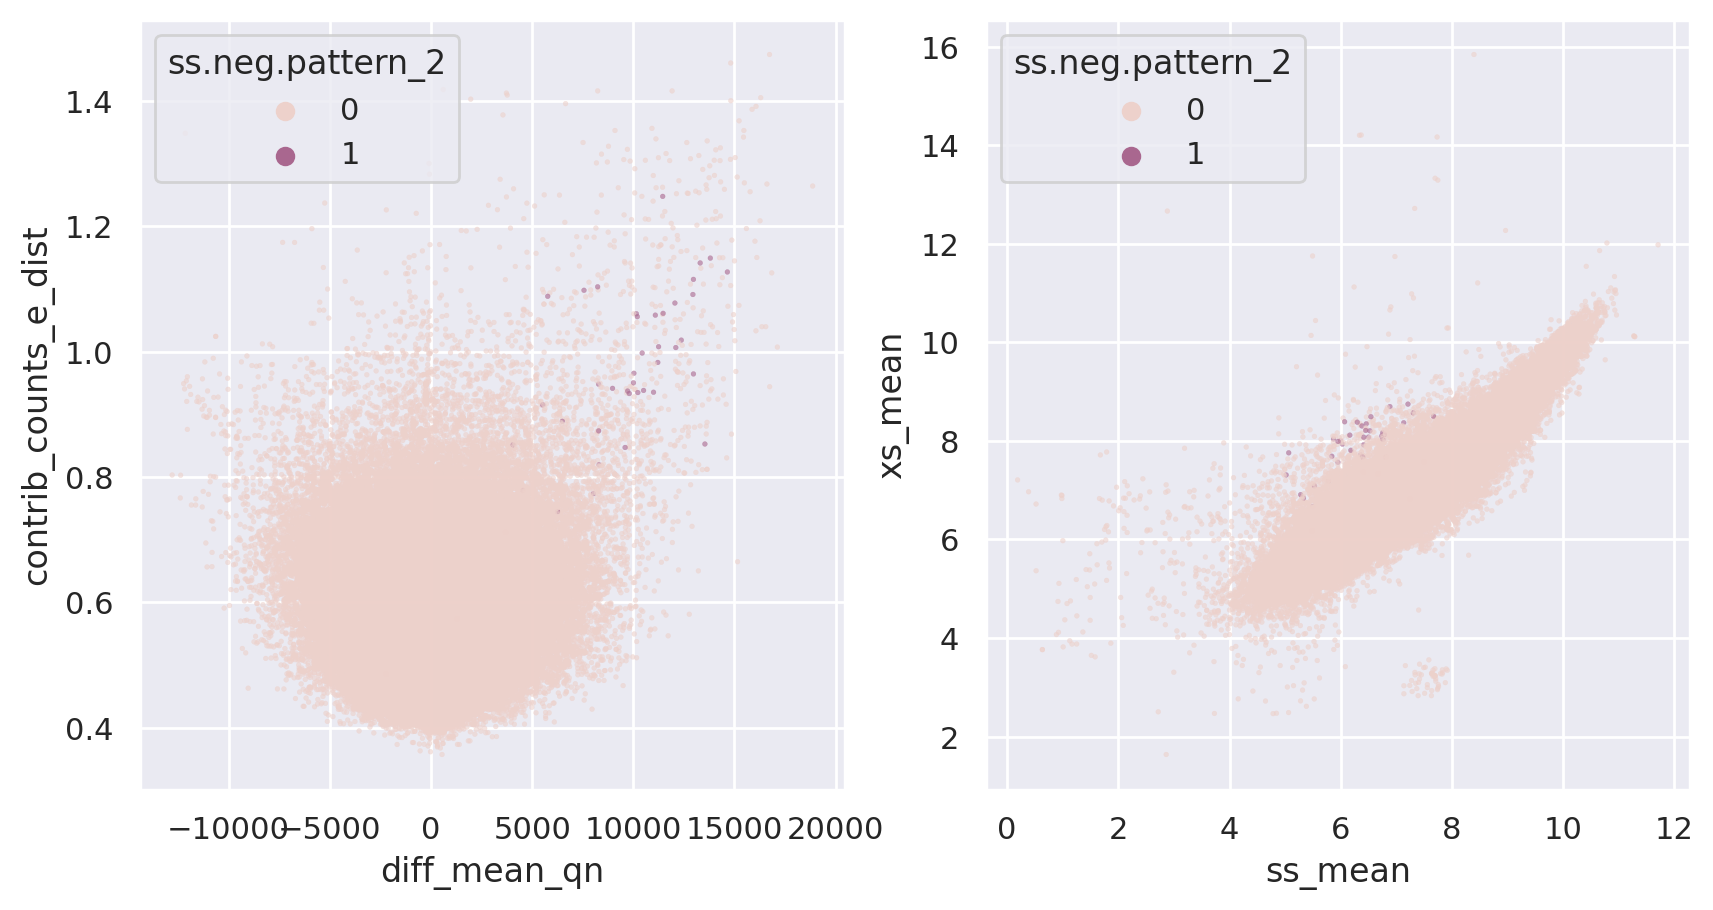

In [13]:
plot_pattern("ss.neg.pattern_2")



/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


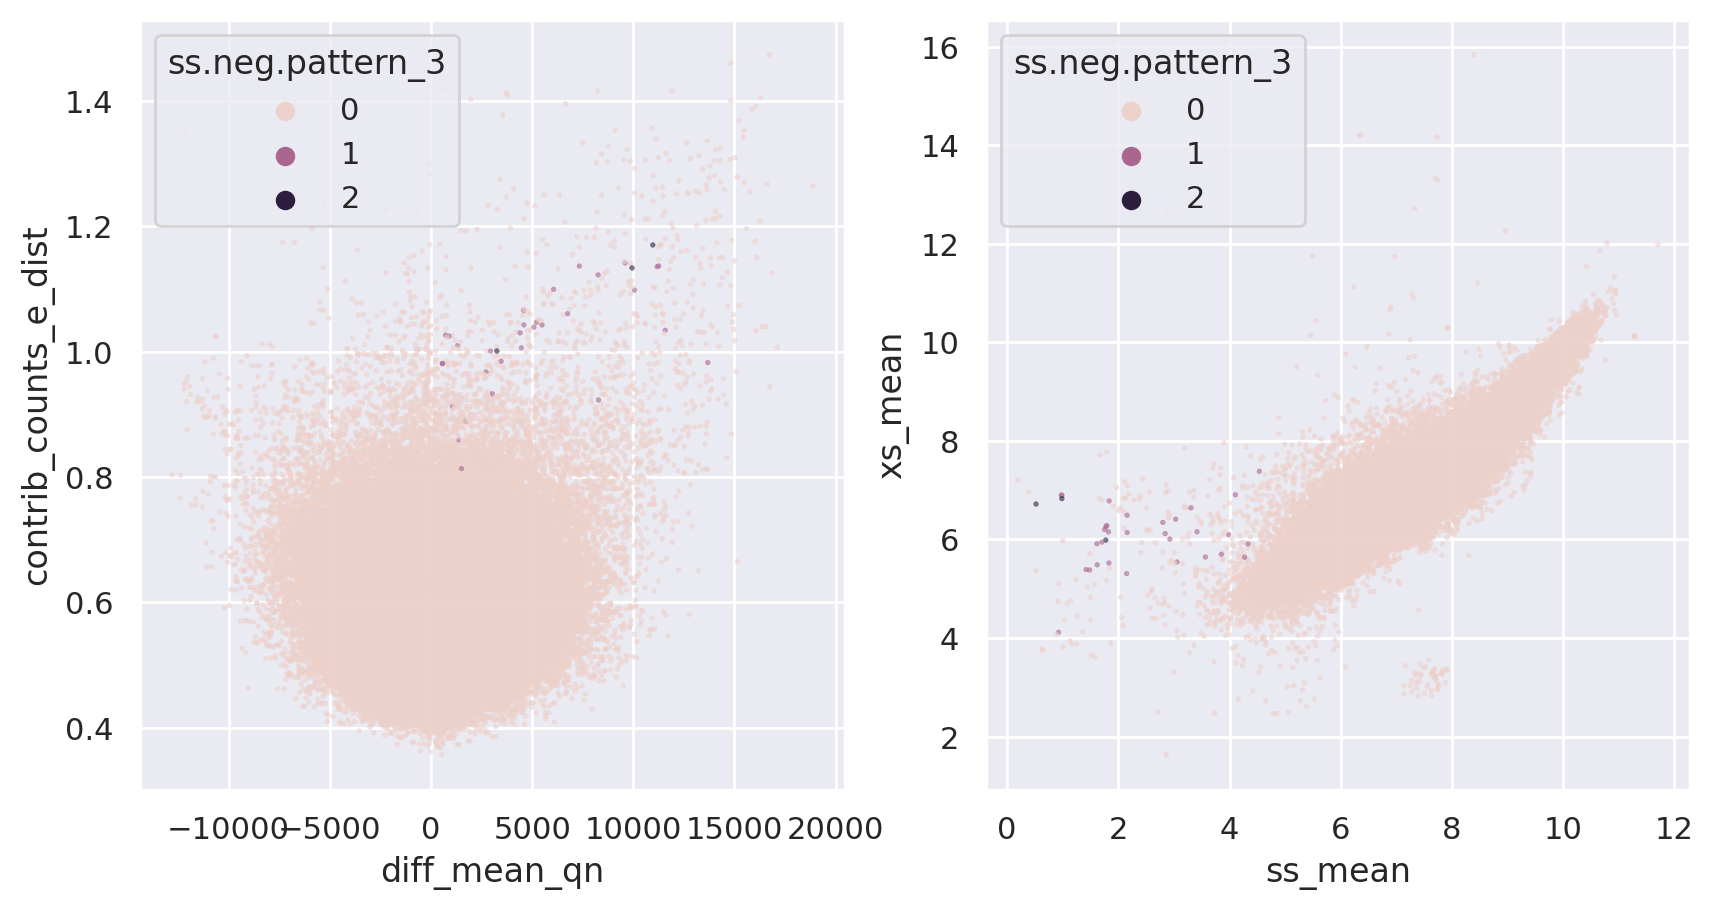

In [14]:
plot_pattern("ss.neg.pattern_3")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


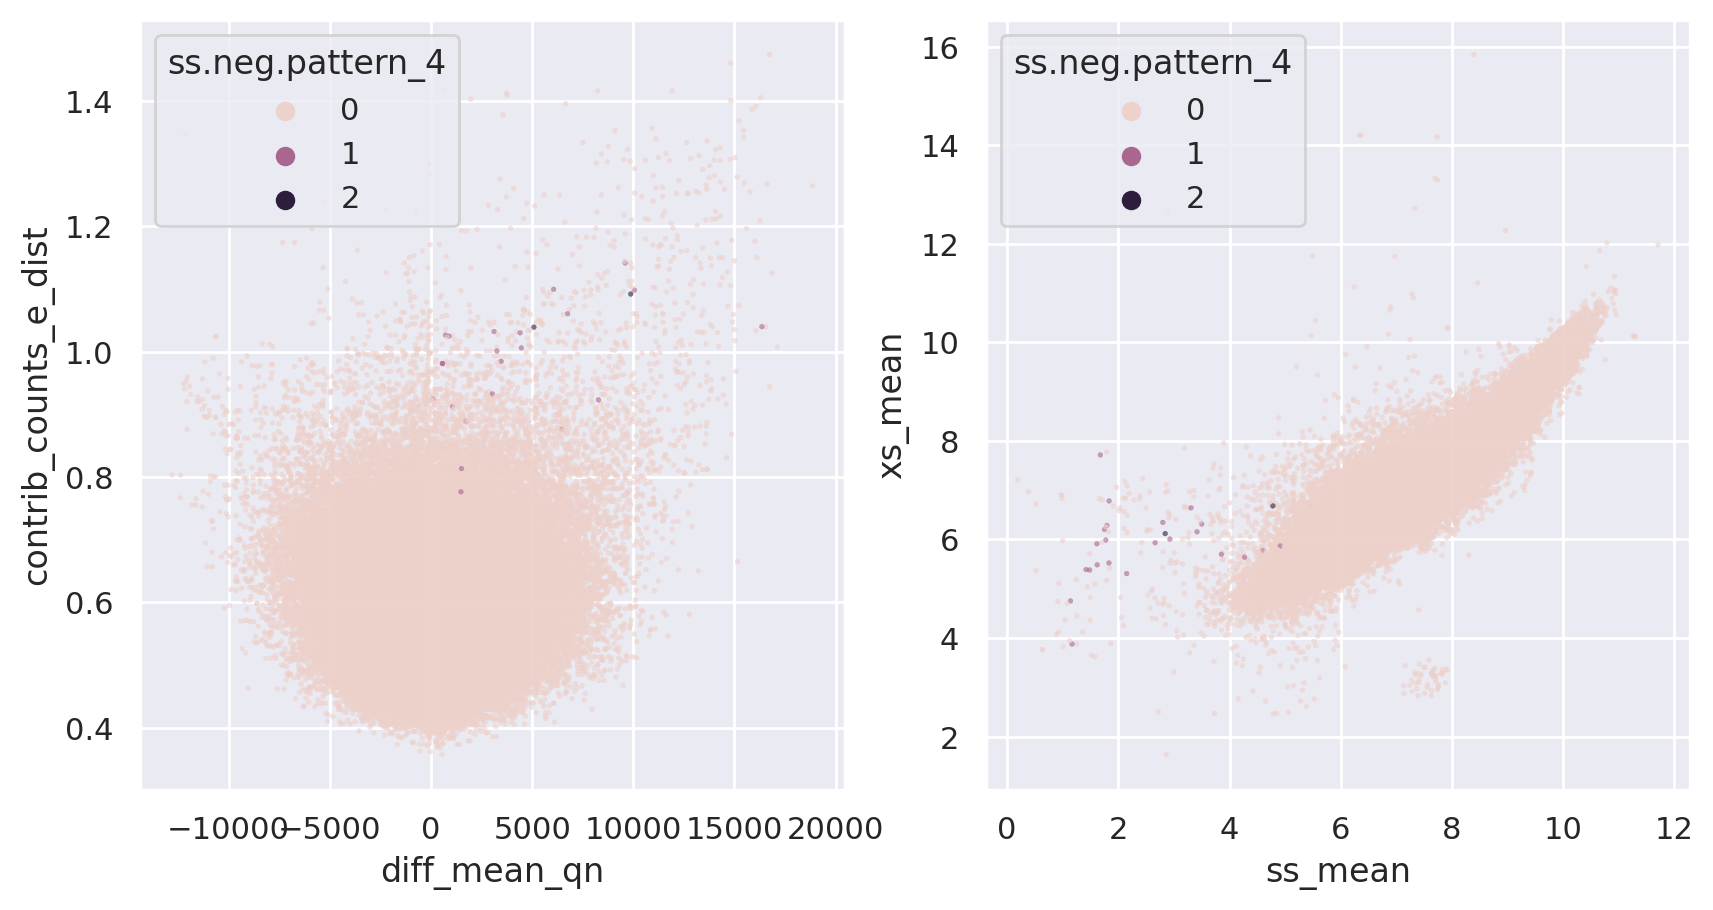

In [15]:
plot_pattern("ss.neg.pattern_4")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


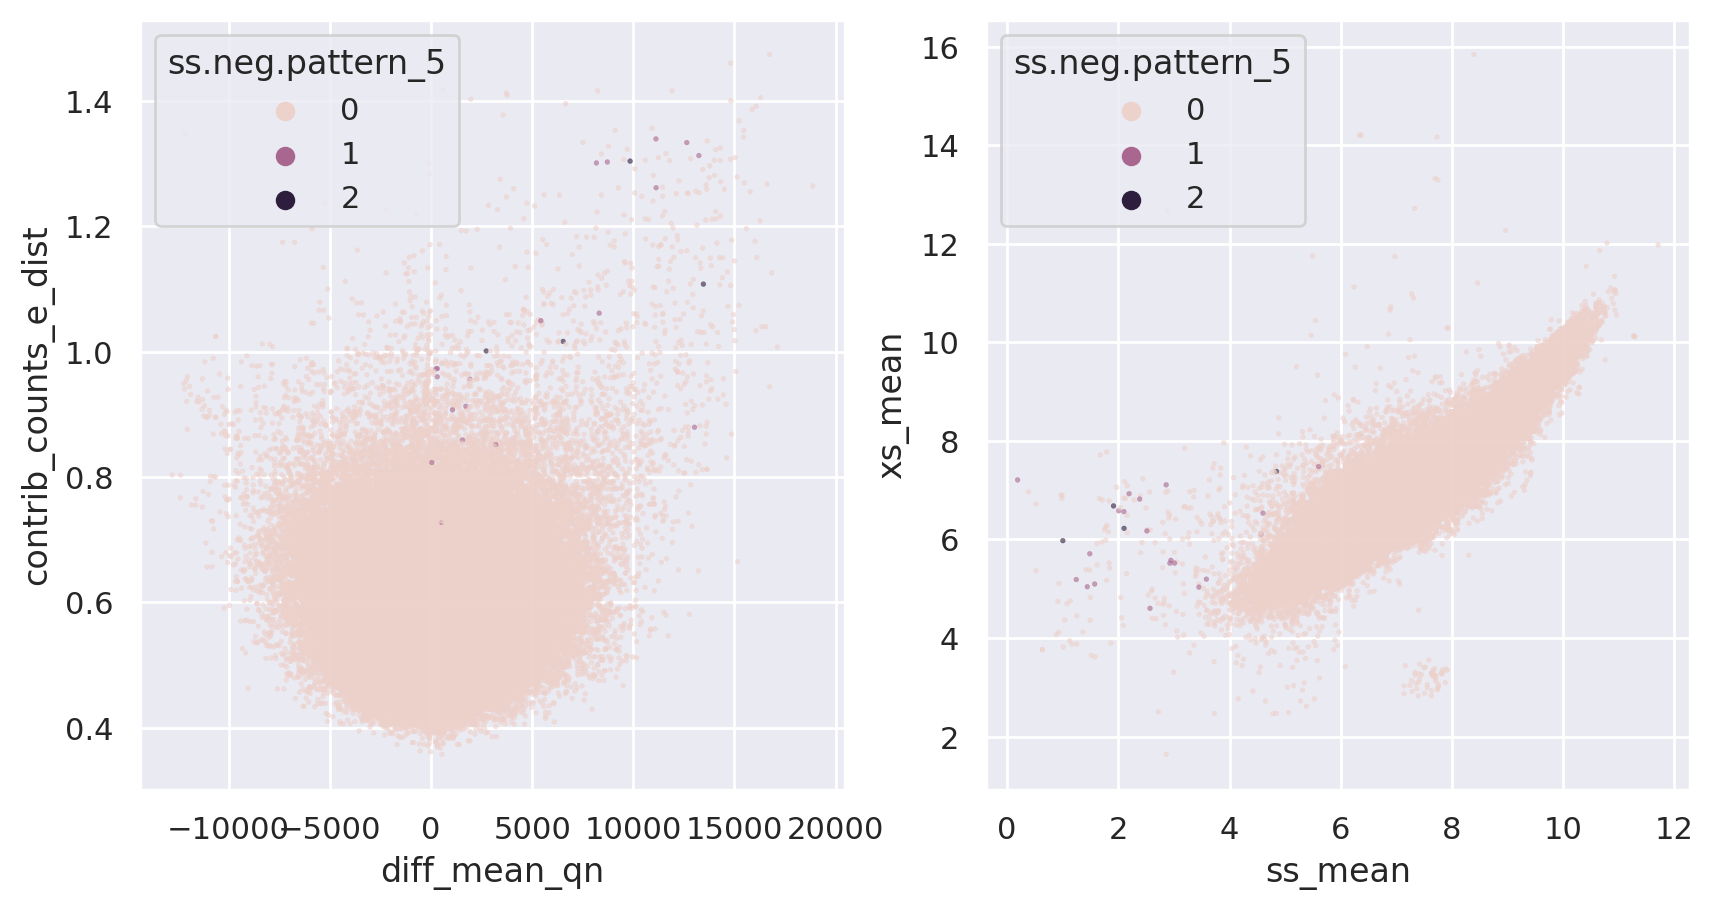

In [16]:
plot_pattern("ss.neg.pattern_5")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


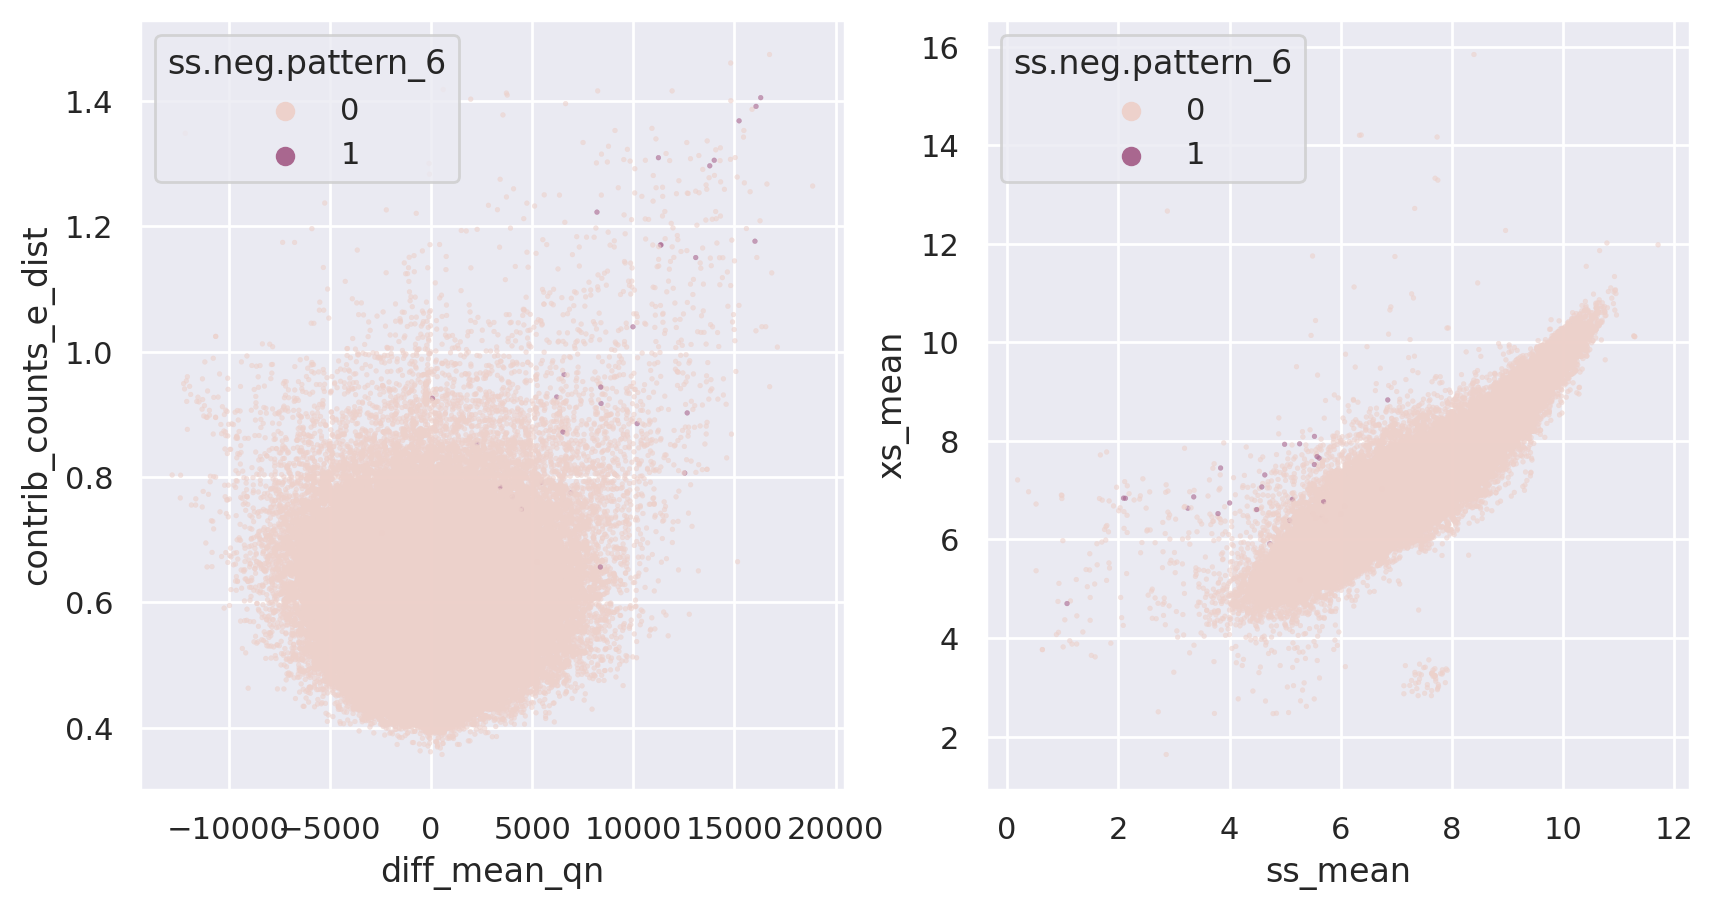

In [17]:
plot_pattern("ss.neg.pattern_6")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


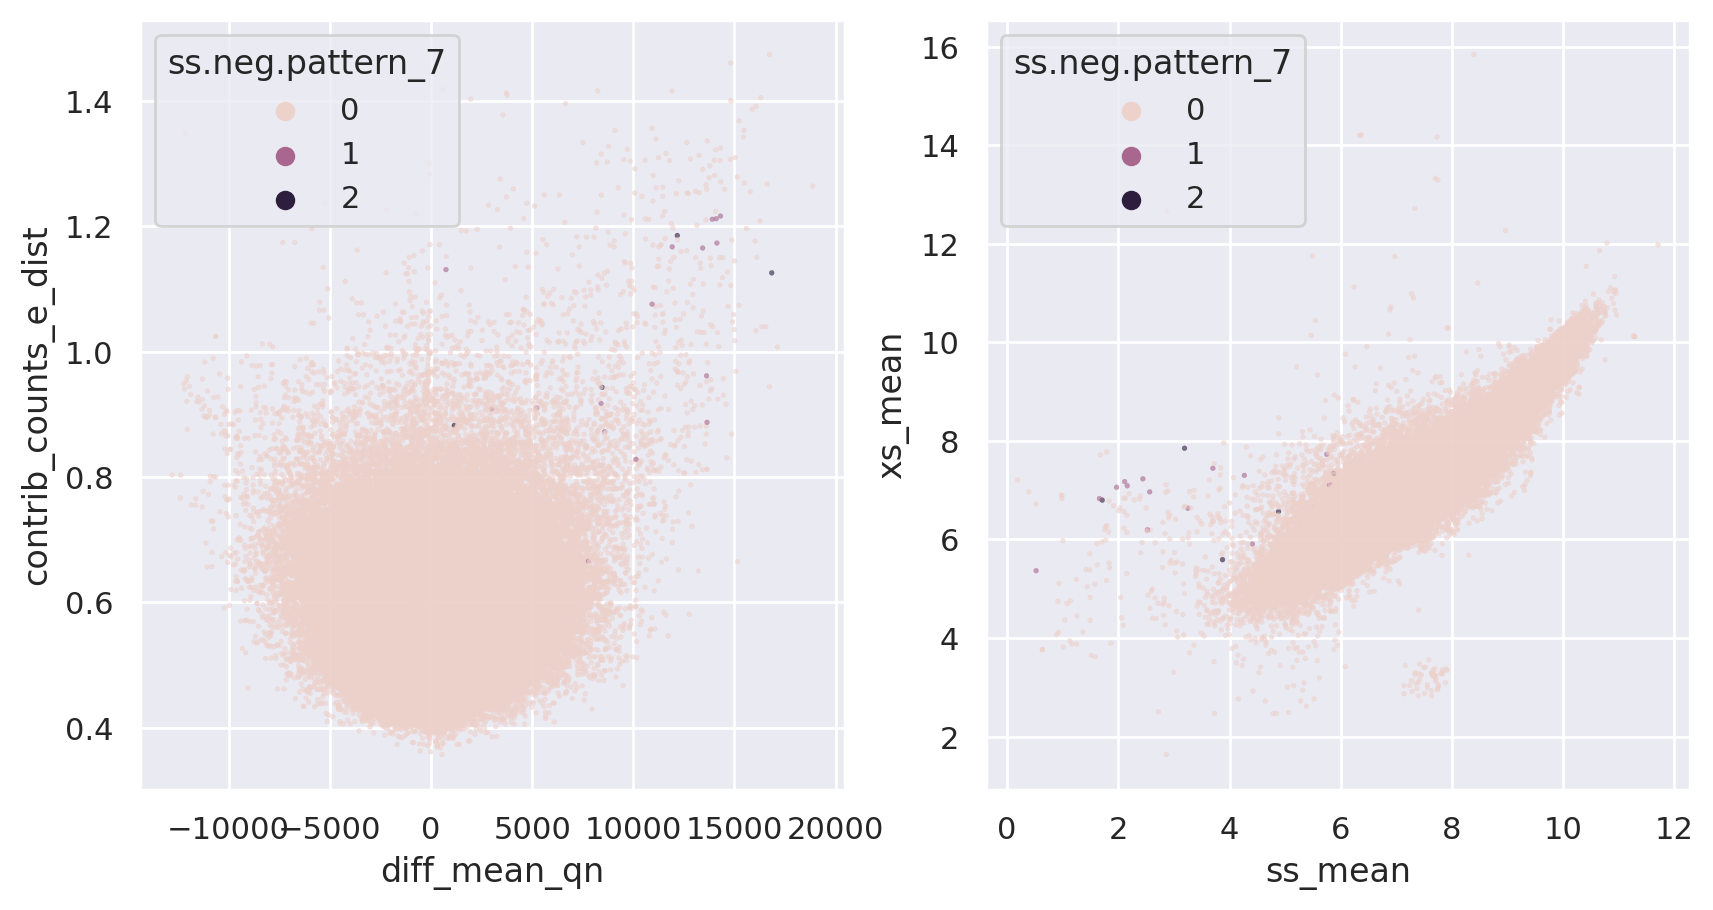

In [18]:
plot_pattern("ss.neg.pattern_7")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


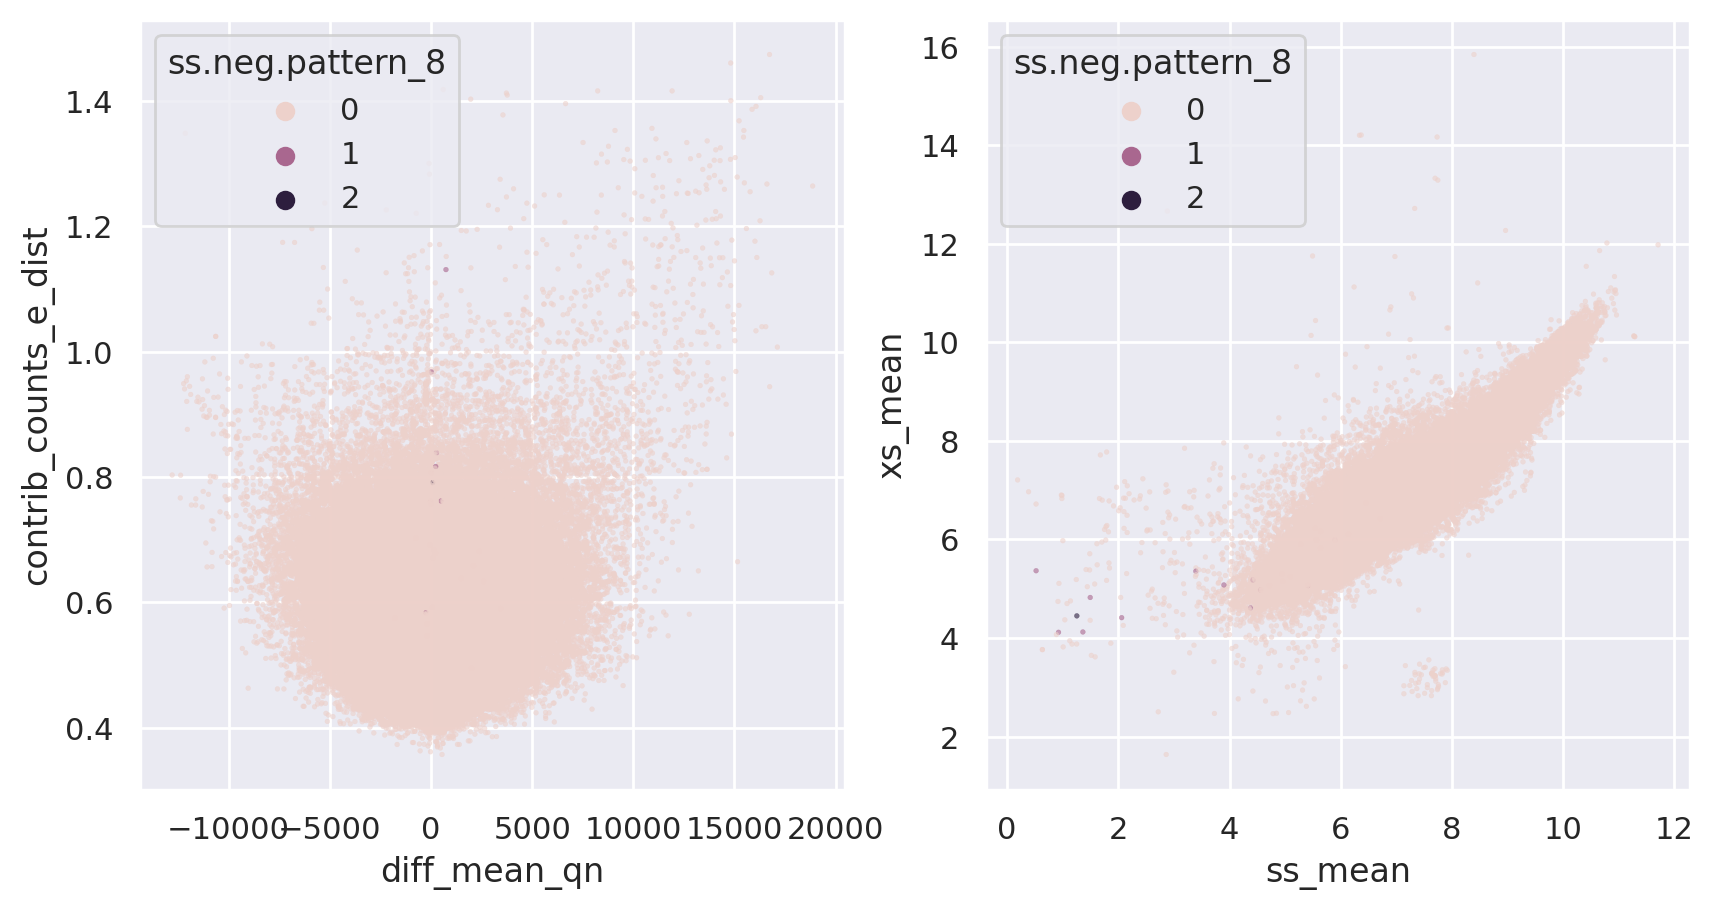

In [19]:
plot_pattern("ss.neg.pattern_8")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


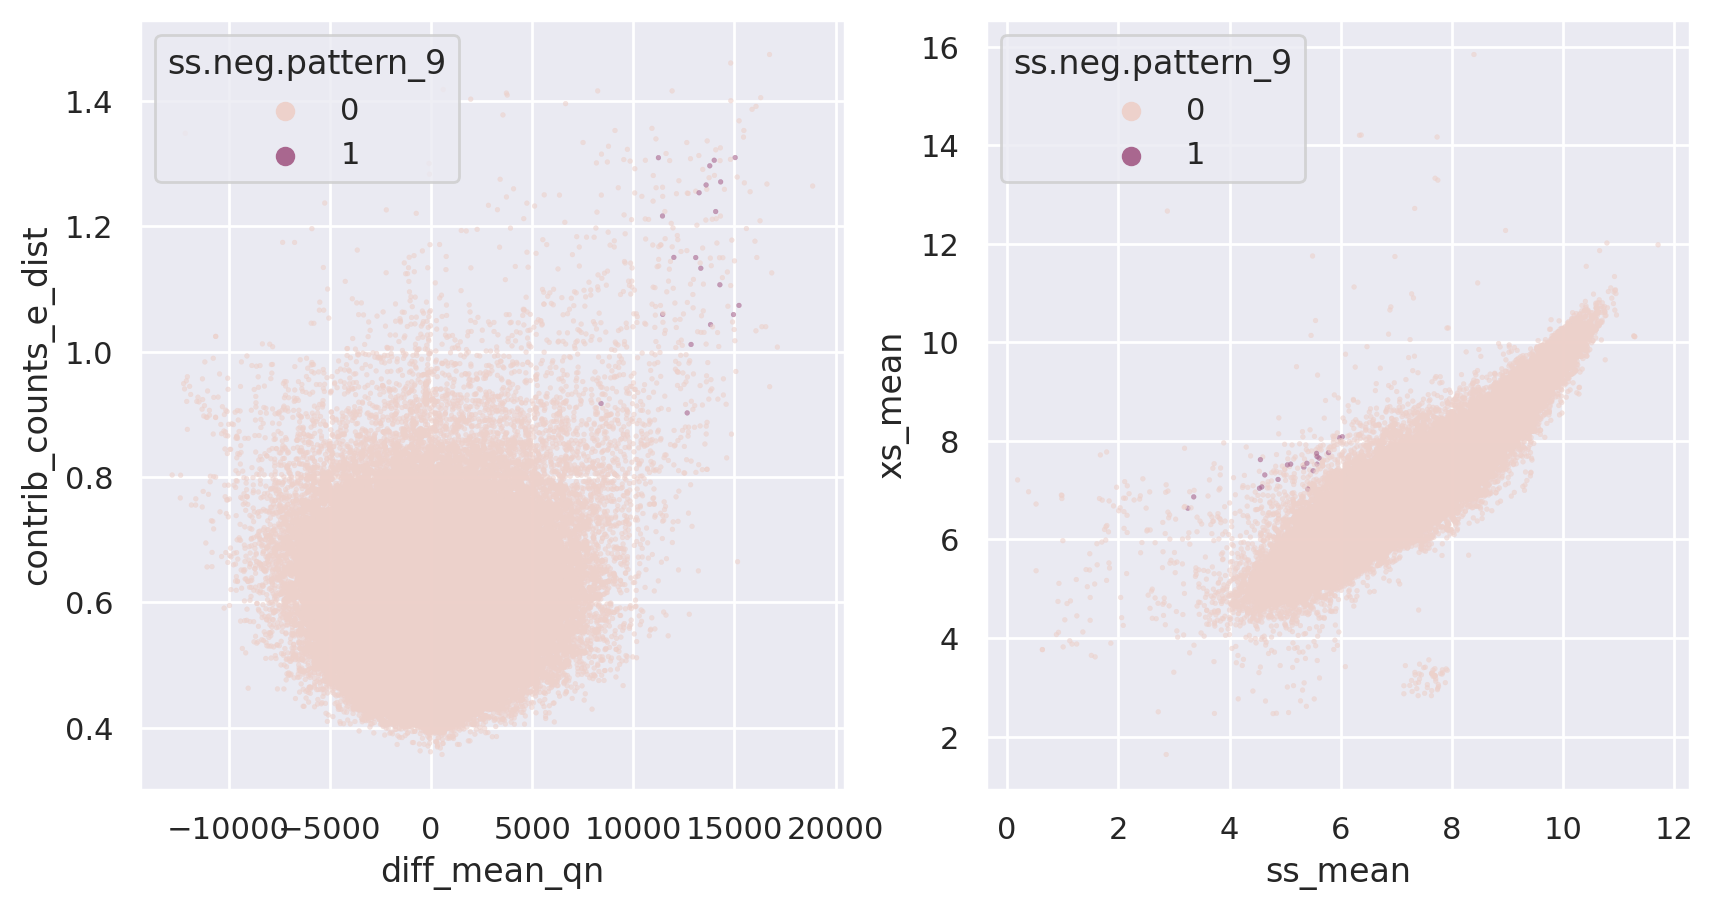

In [20]:
plot_pattern("ss.neg.pattern_9")


ValueError: Could not interpret value `ss.neg.pattern_10` for parameter `hue`

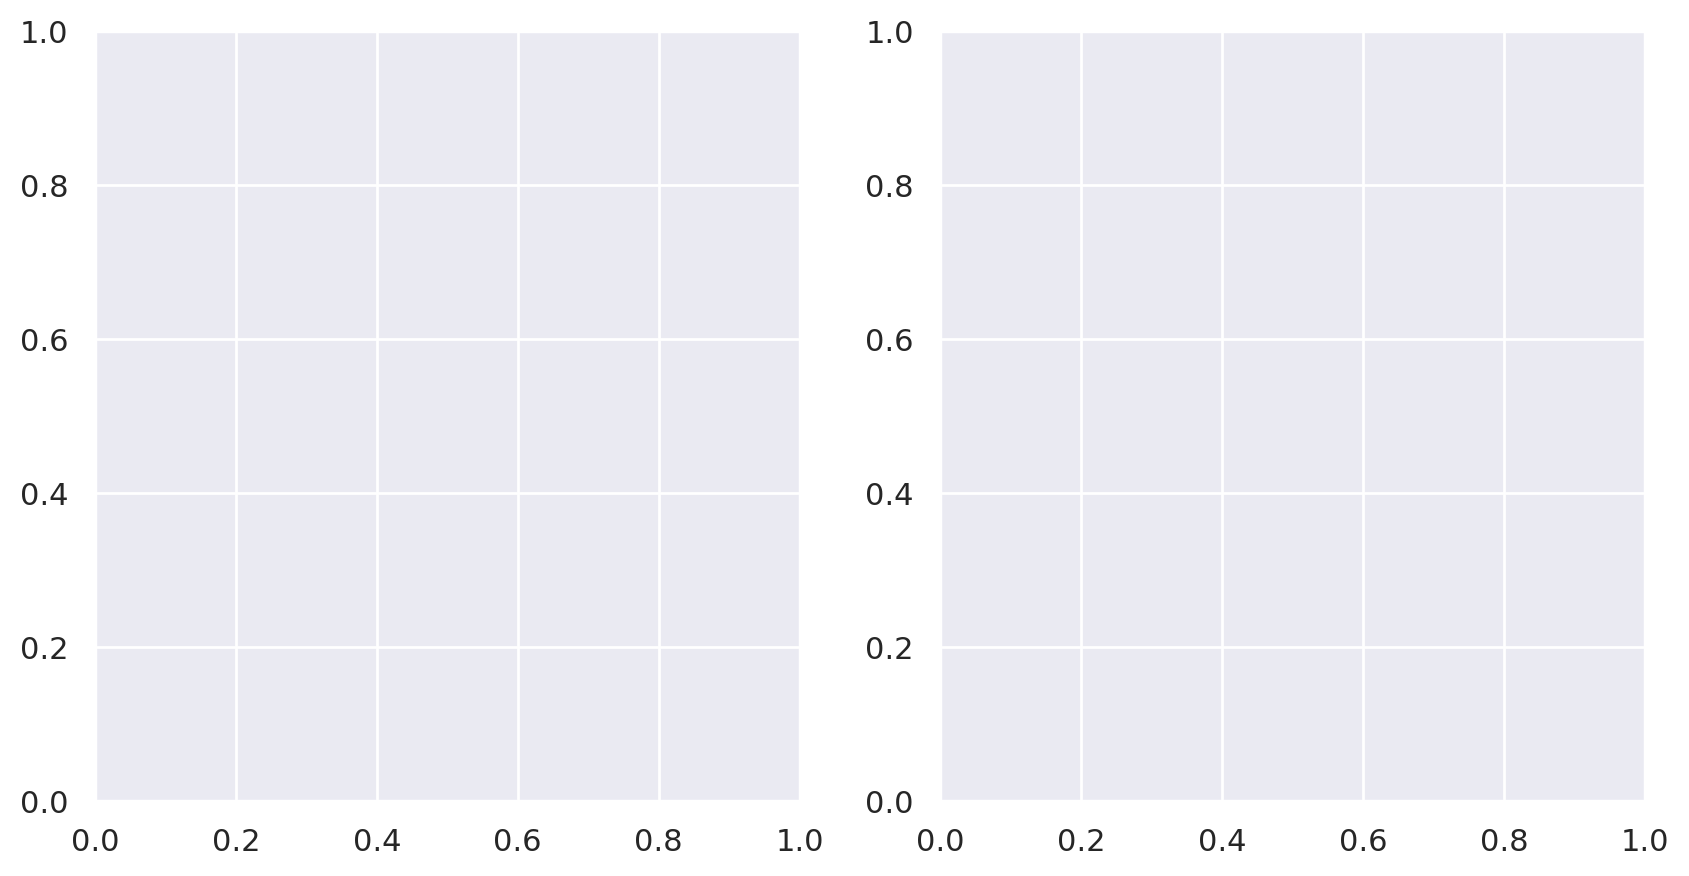

In [21]:
plot_pattern("ss.neg.pattern_10")


In [ ]:
plot_pattern("ss.pos.pattern_15")


In [ ]:
plot_pattern("xs.pos.pattern_39")
